In [1]:
## analyse the data
import mne

In [3]:
raw=mne.io.read_raw_gdf('BCICIV_2a_gdf/A04T.gdf',
                         eog=['EOG-left', 'EOG-central', 'EOG-right'])
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

Extracting EDF parameters from C:\doctorado-en-ciencias-en-ciencias-de-datos\eeg-ml-dl\BCICIV_2a_gdf\A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...


C:\Users\iemma\anaconda3\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Measurement date,"November 08, 2004 12:00:00 GMT"
Experimenter,Unknown
Participant,A04
Digitized points,Not available
Good channels,22 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.50 Hz
Lowpass,100.00 Hz


In [4]:
raw.annotations

<Annotations | 610 segments: 1023 (26), 1072 (1), 32766 (7), 768 (288), ...>

In [5]:
events=mne.events_from_annotations(raw)
events[1]

Used Annotations descriptions: ['1023', '1072', '32766', '768', '769', '770', '771', '772']


{'1023': 1,
 '1072': 2,
 '32766': 3,
 '768': 4,
 '769': 5,
 '770': 6,
 '771': 7,
 '772': 8}

In [6]:
events[0][0:20]

array([[    0,     0,     3],
       [    0,     0,     2],
       [19905,     0,     3],
       [20255,     0,     4],
       [20755,     0,     8],
       [22258,     0,     4],
       [22758,     0,     8],
       [24176,     0,     4],
       [24676,     0,     5],
       [26128,     0,     4],
       [26628,     0,     8],
       [28136,     0,     4],
       [28636,     0,     5],
       [30247,     0,     4],
       [30747,     0,     5],
       [32164,     0,     4],
       [32664,     0,     8],
       [34214,     0,     4],
       [34714,     0,     8],
       [36145,     0,     4]])

From the paper
'1023': 1 (Rejected trial),
'1072': 2 (Eye movements),
'276': 3 (eyes open)),
'277': 4 (eyes closed),
'32766':5 (Start of a new run),
'768': 6 (Start of a trial),
'769': 7 (class 1),
'770': 8 (class 2),
'771': 9 (class 3),
'772': 10 (class 4)

In [27]:
event_dict={
 'reject':1,
 'eye move':2,
 'eye open':3,
 'eye close':4,
 'new run':5,
 'new trial':6,
 'class 1':7,
 'class 2':8,
}

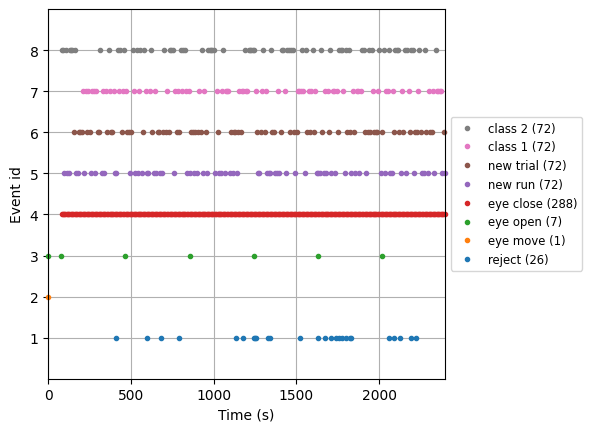

In [28]:
#https://mne.tools/stable/auto_tutorials/intro/10_overview.html#sphx-glr-auto-tutorials-intro-10-overview-py
fig = mne.viz.plot_events(events[0], event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

In [29]:
epochs = mne.Epochs(raw, events[0], event_id=[7,8,2,1],tmin= -0.1, tmax=0.7, preload=True)

Not setting metadata
171 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 171 events and 201 original time points ...
1 bad epochs dropped


In [30]:
epochs.get_data().shape


C:\Users\iemma\AppData\Local\Temp\ipykernel_30836\854070821.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data().shape


(170, 22, 201)

In [31]:
label=epochs.events[:,-1]
len(label)

170

In [36]:
evoked_0 = epochs['1'].average()
evoked_1 = epochs['2'].average()
evoked_2 = epochs['3'].average()
evoked_3 = epochs['4'].average()

RuntimeError: epochs.average() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.

In [35]:
#left,right,foot,tongue
dicts={'class0':evoked_0,'class1':evoked_1,'class2':evoked_2,'class3':evoked_3}
mne.viz.plot_compare_evokeds(dicts)

NameError: name 'evoked_2' is not defined